In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob

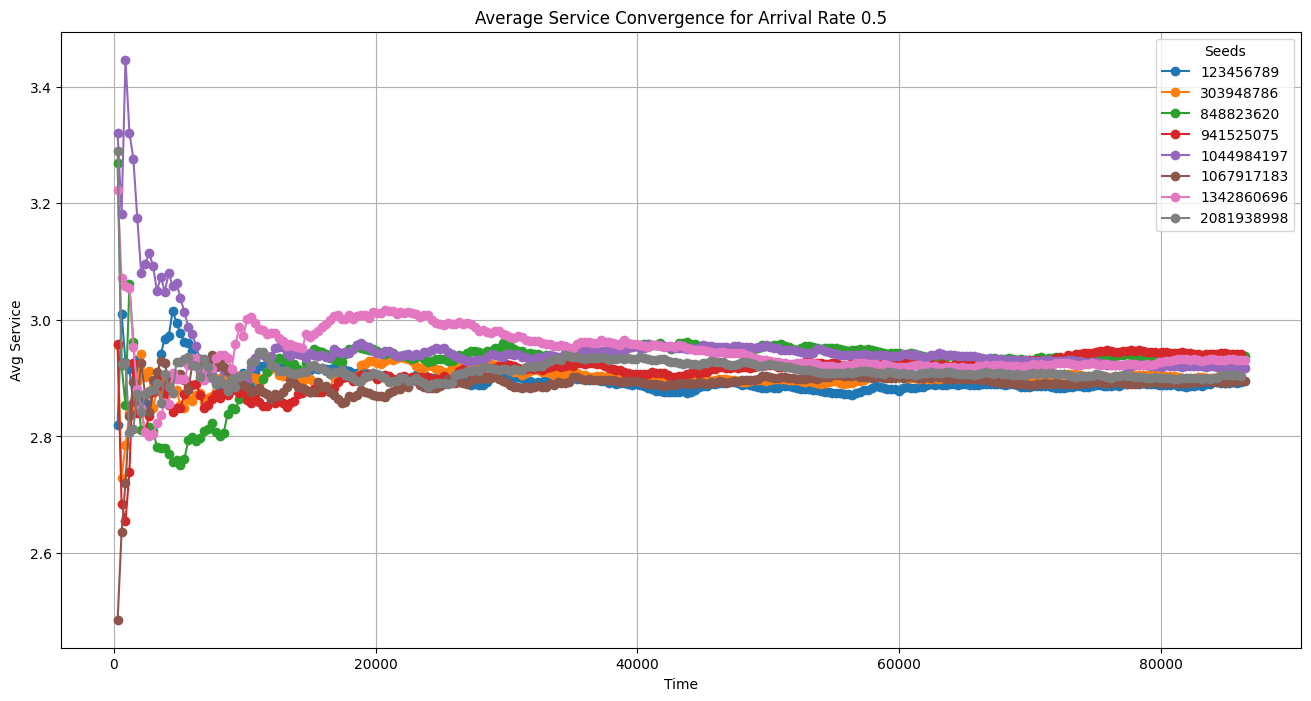

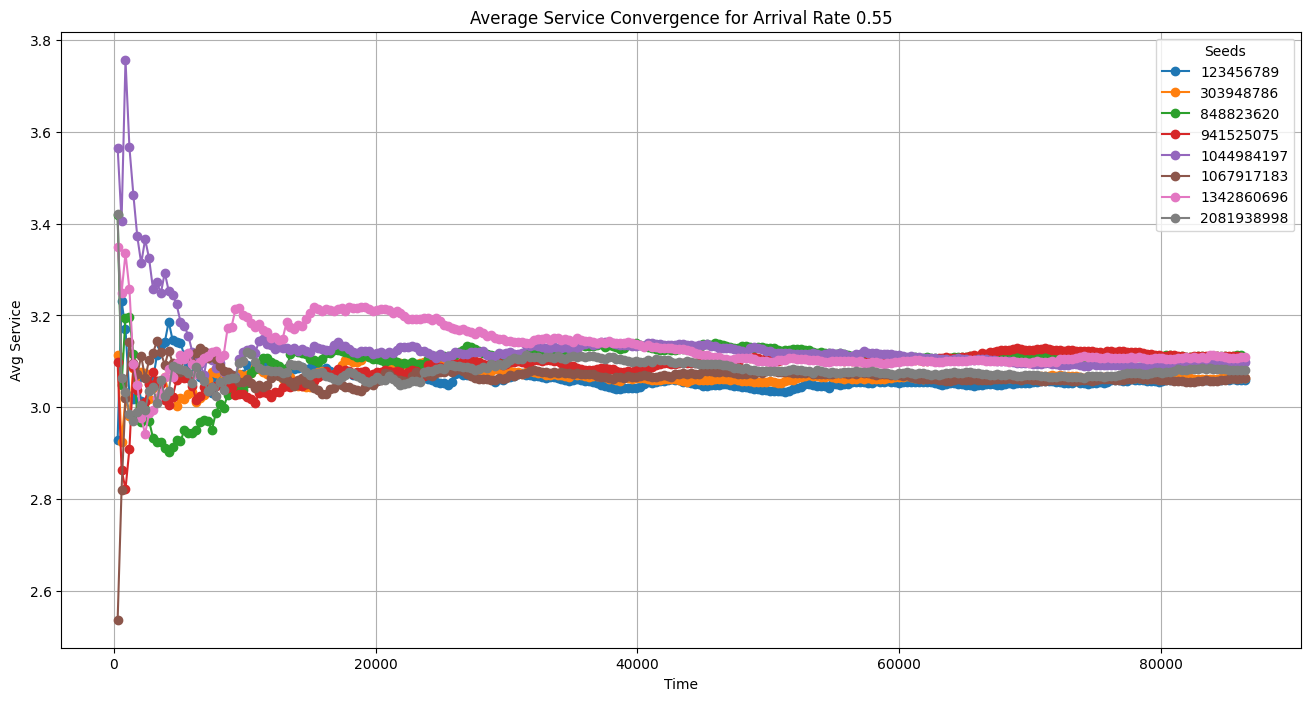

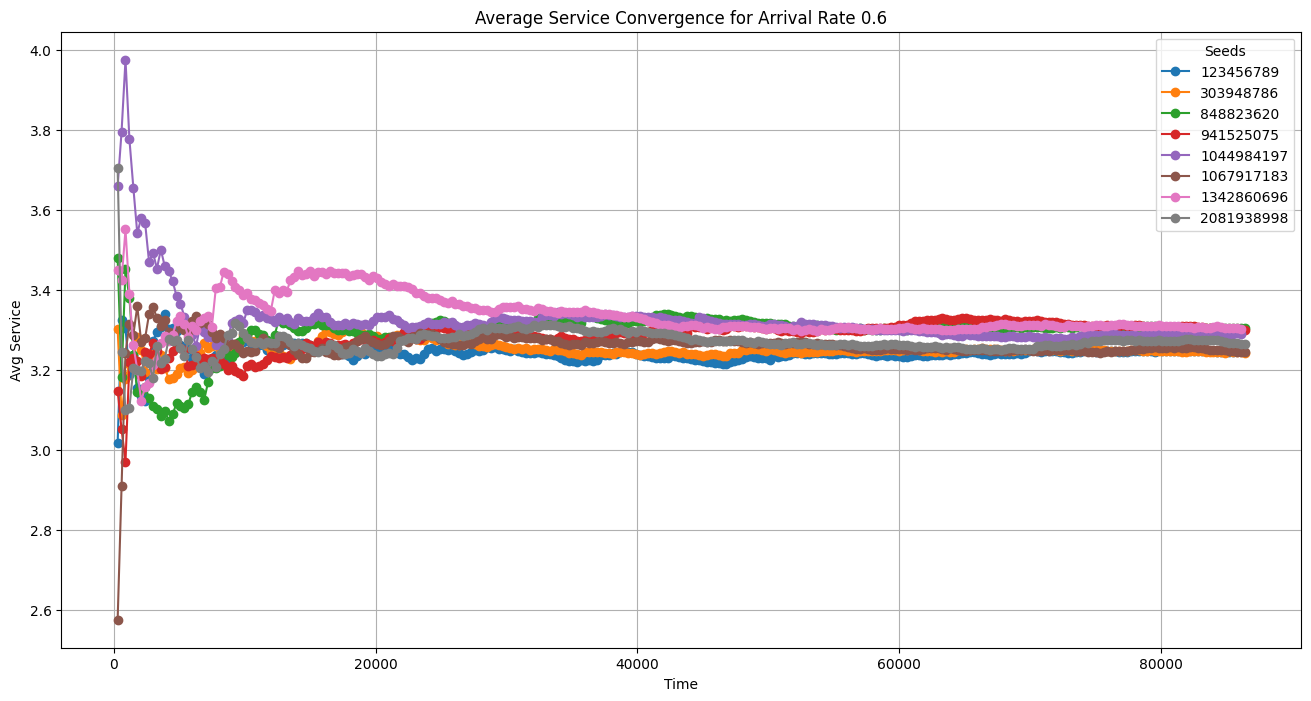

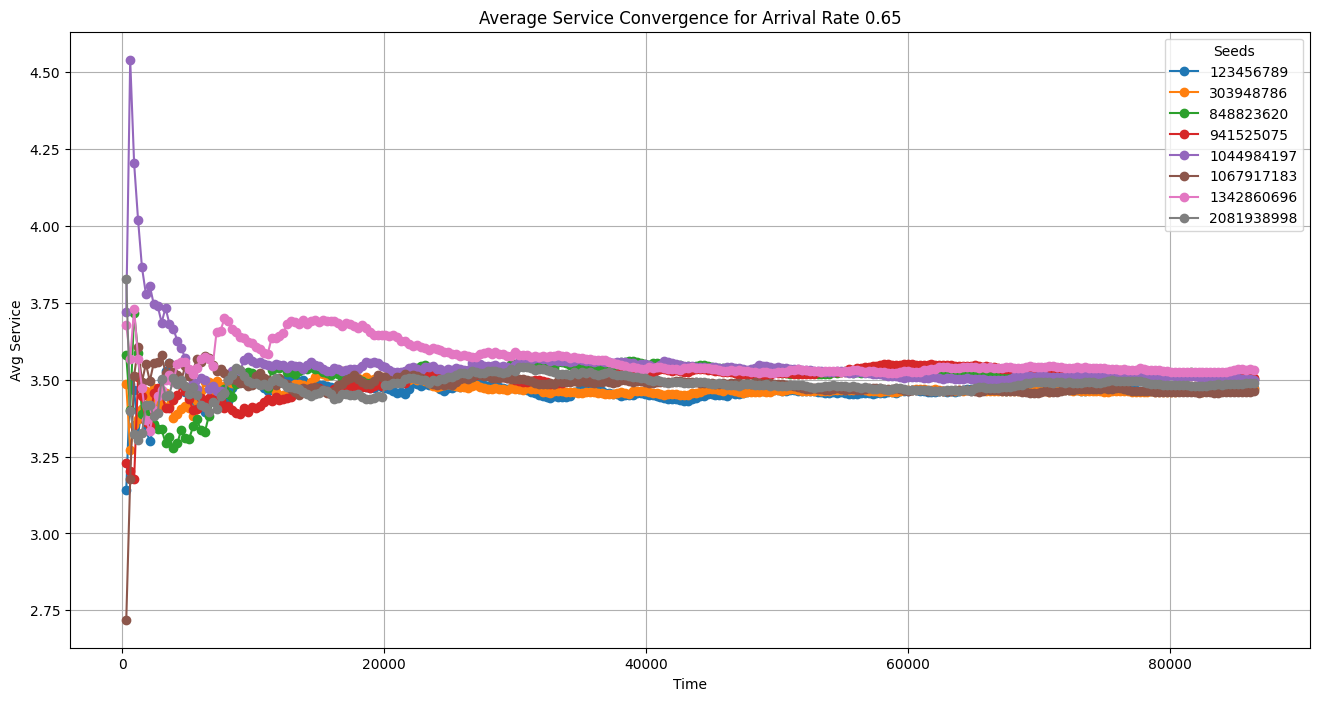

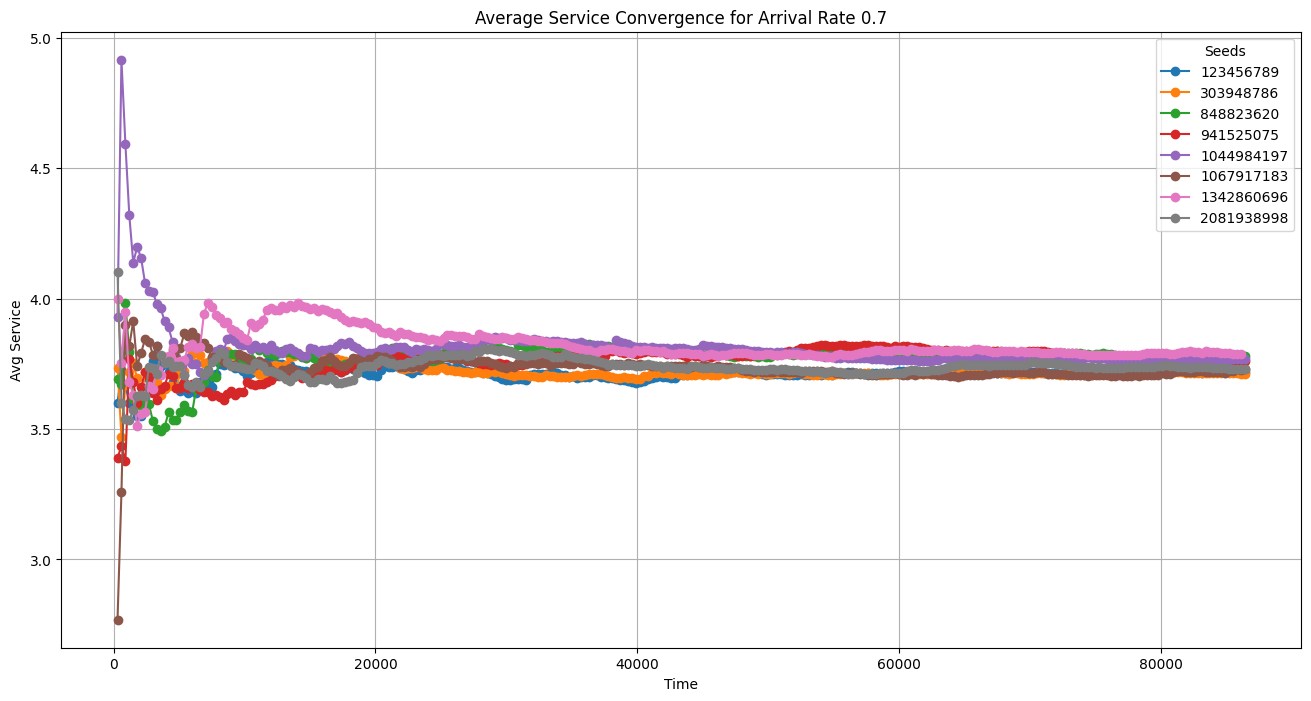

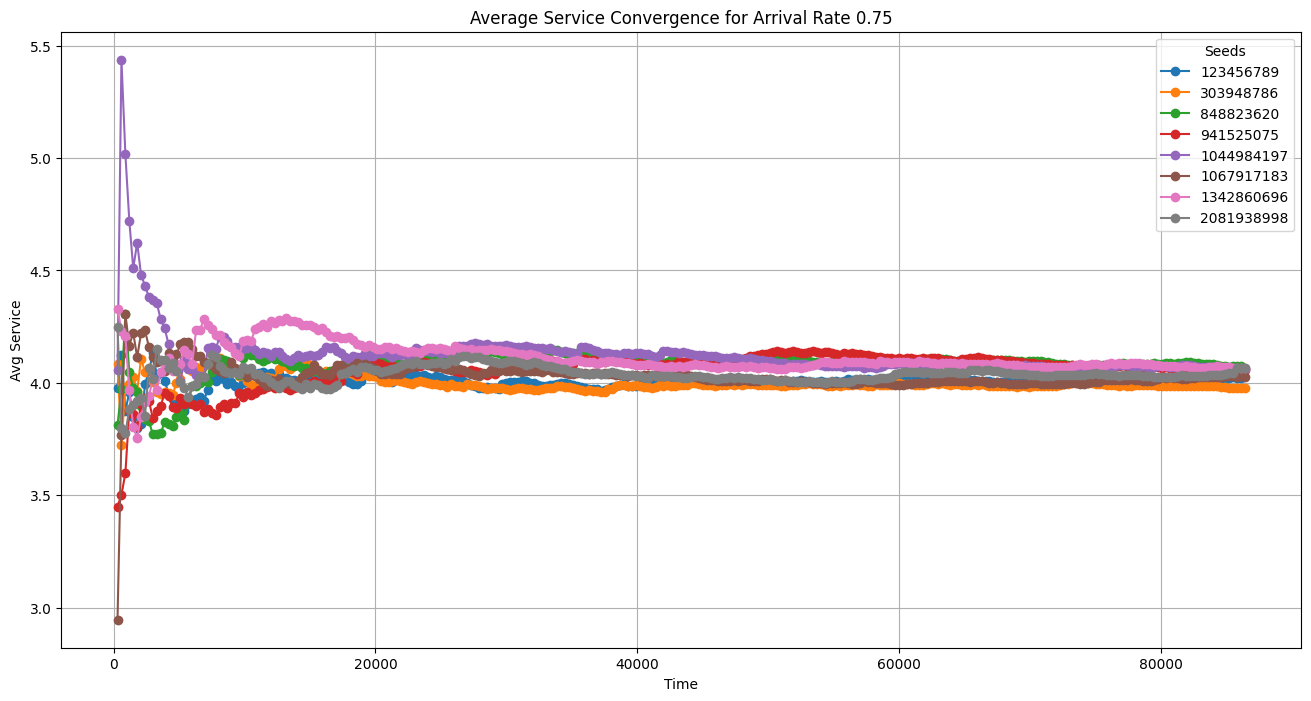

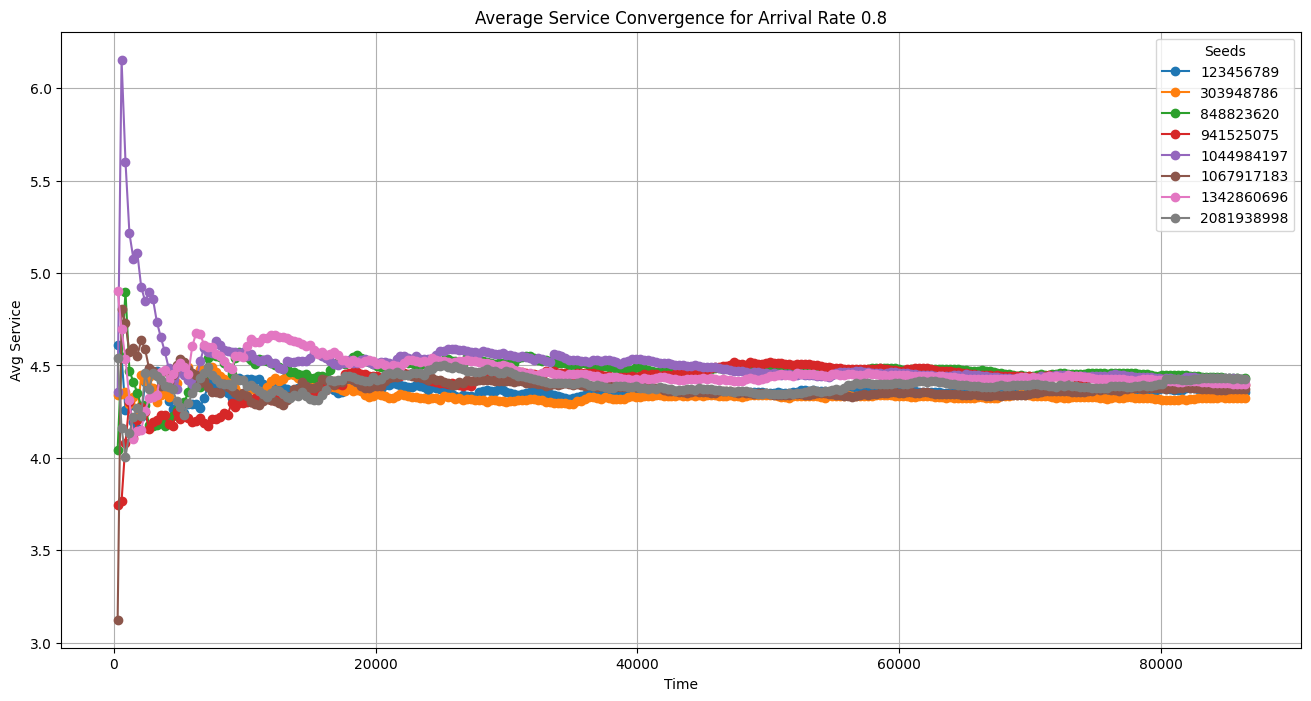

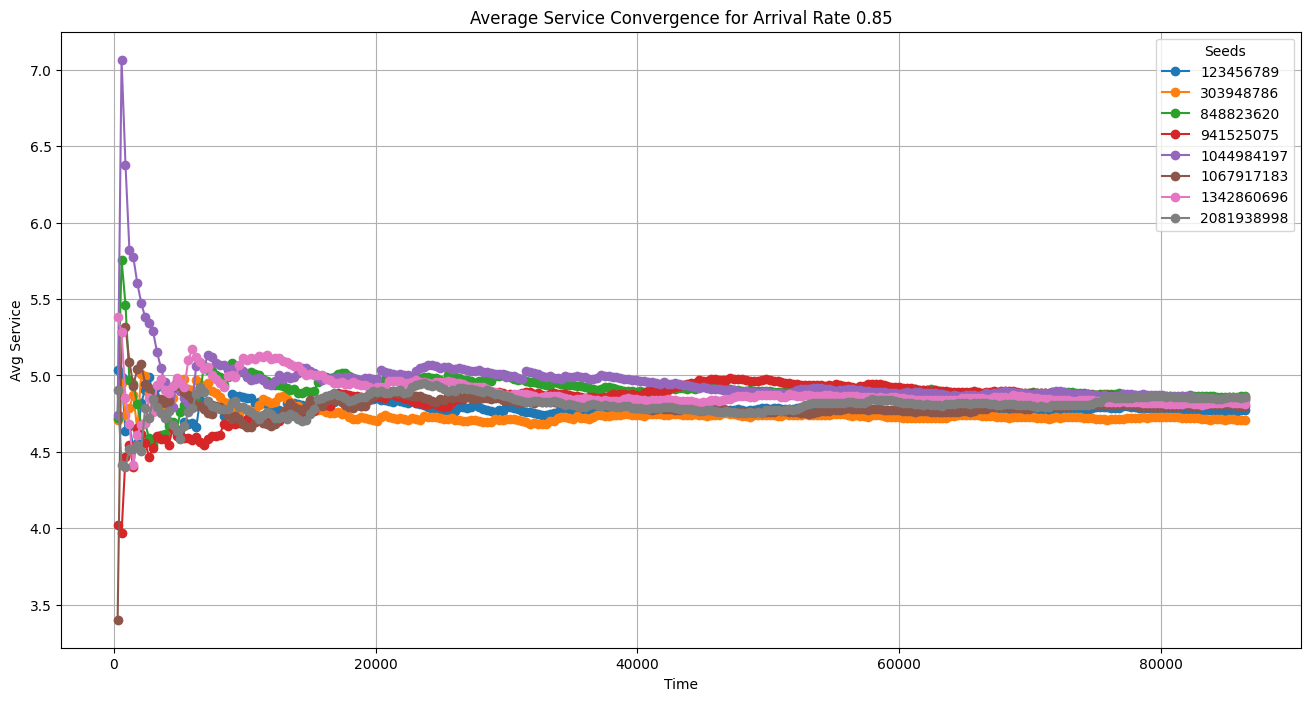

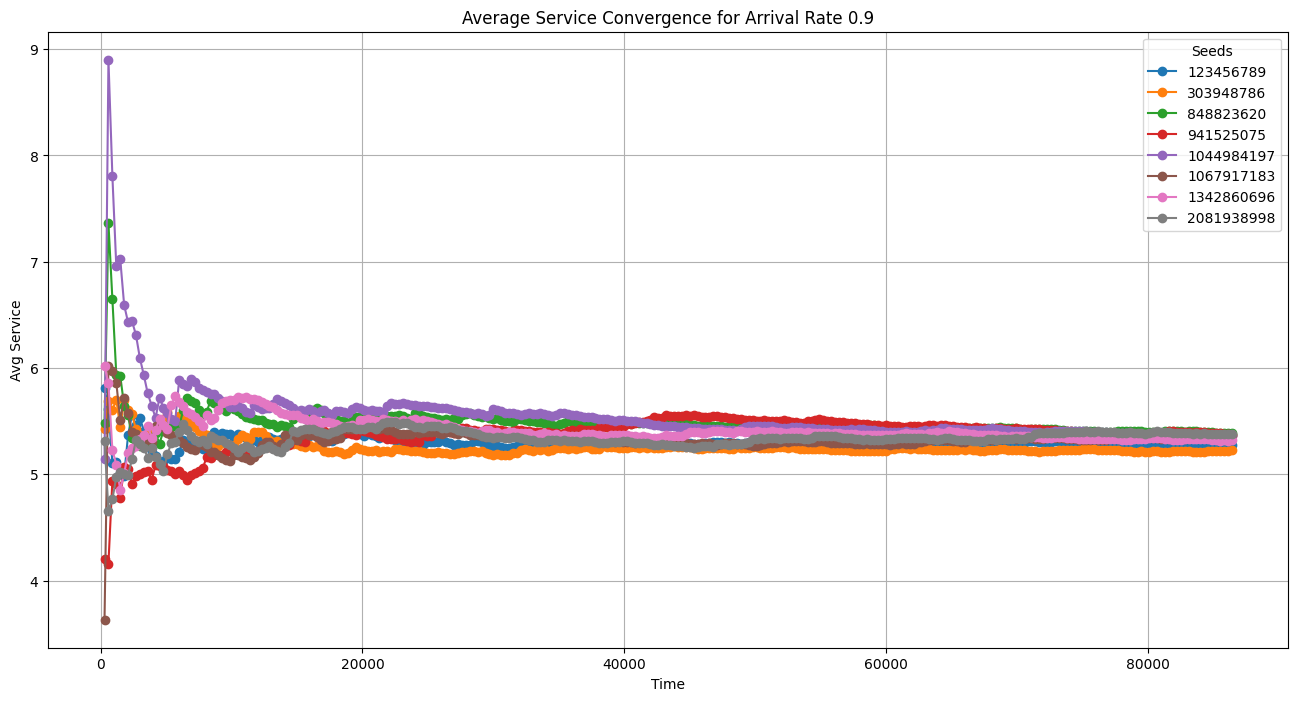

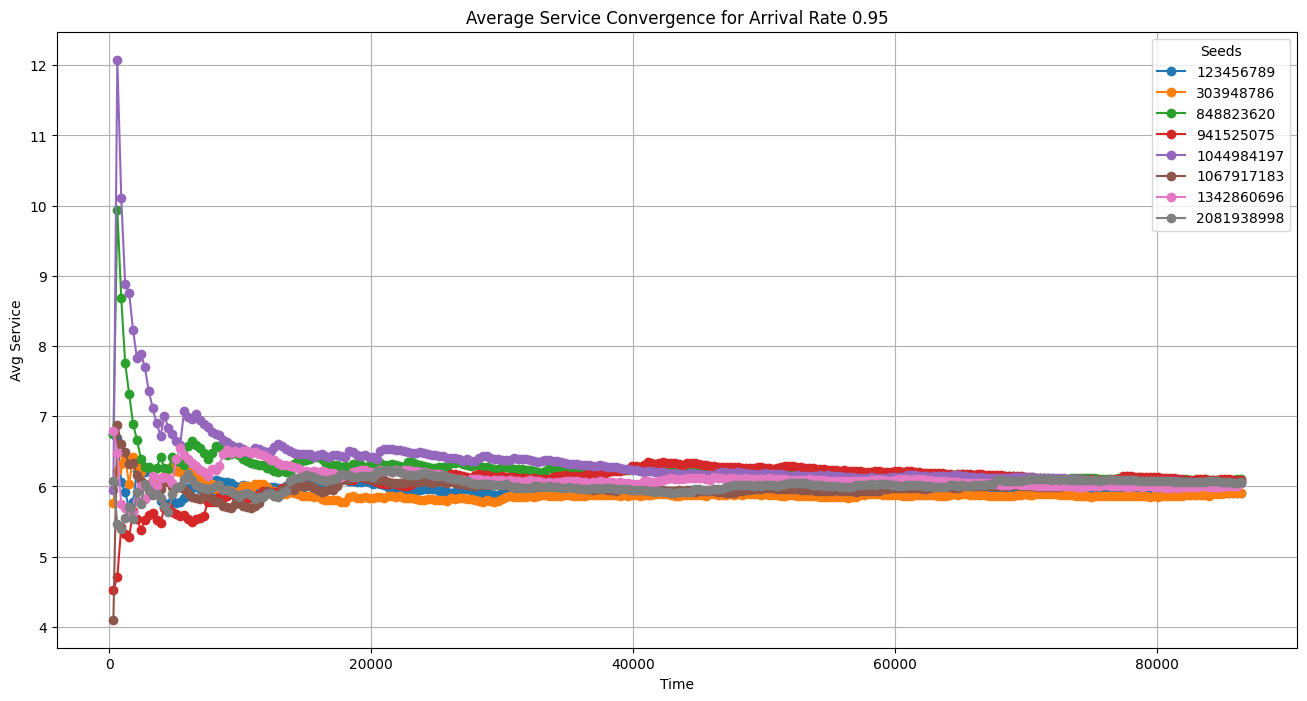

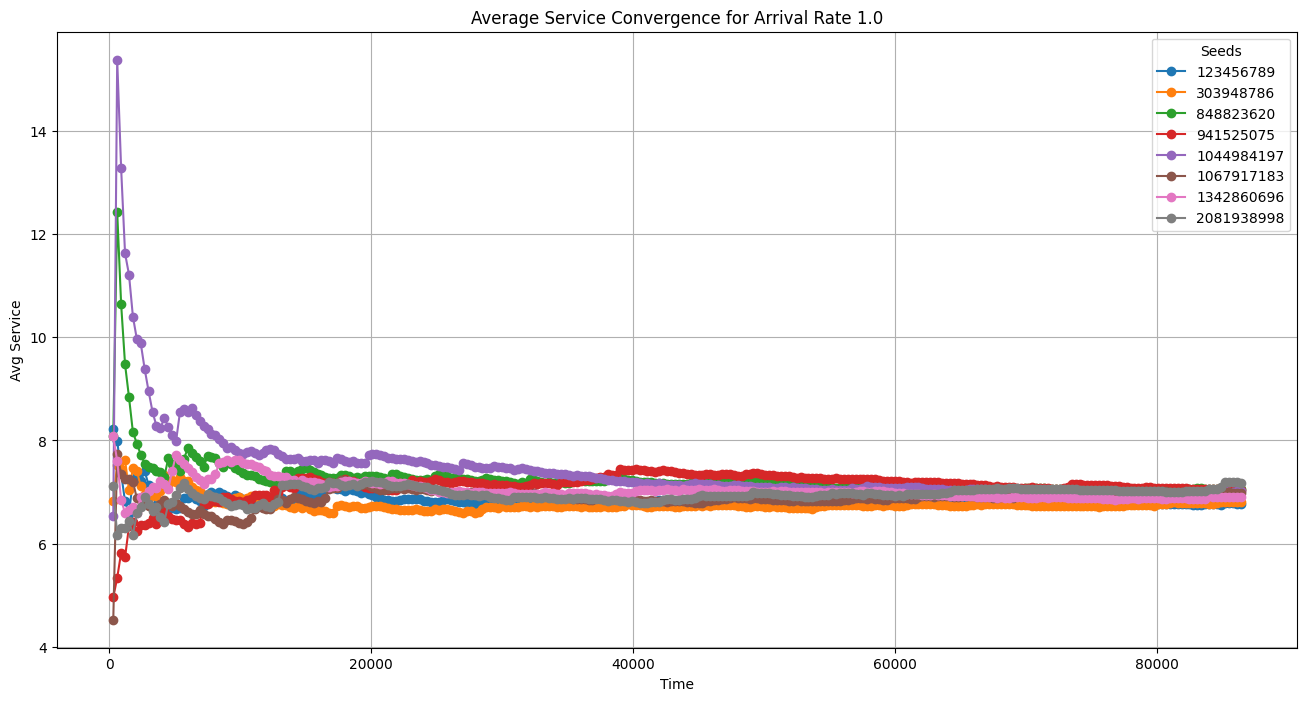

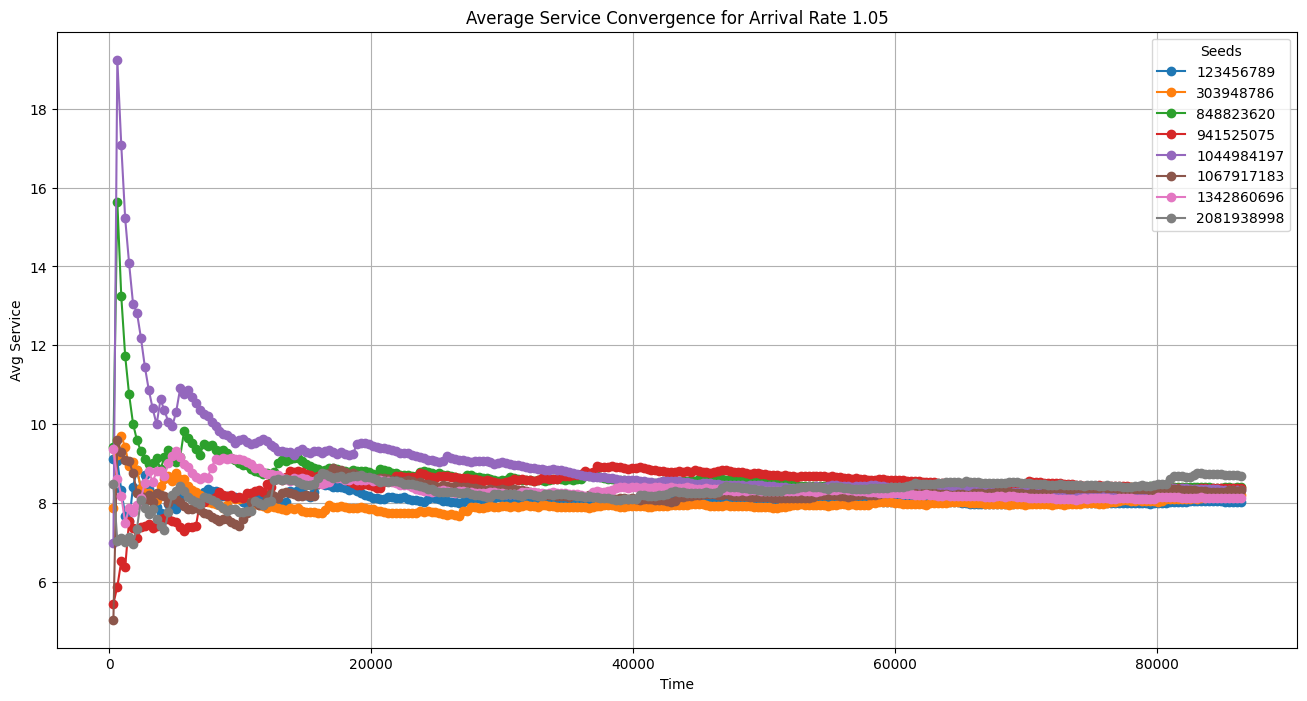

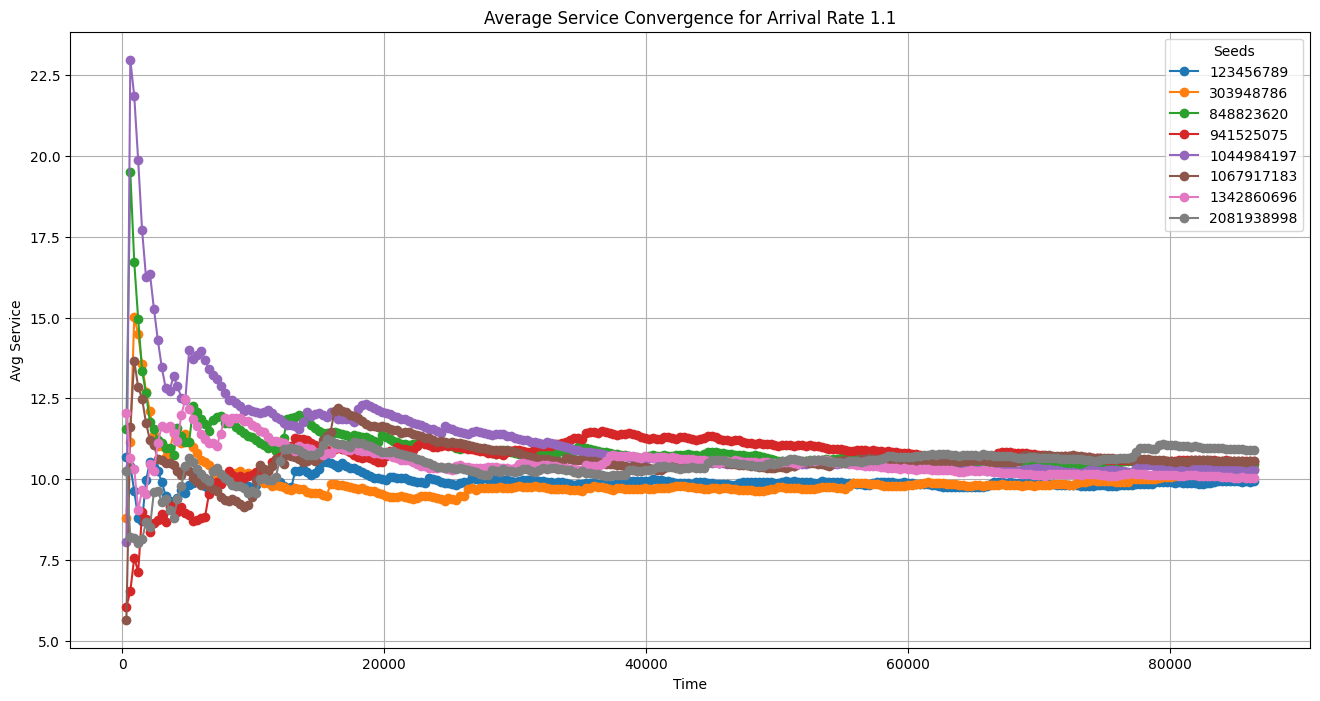

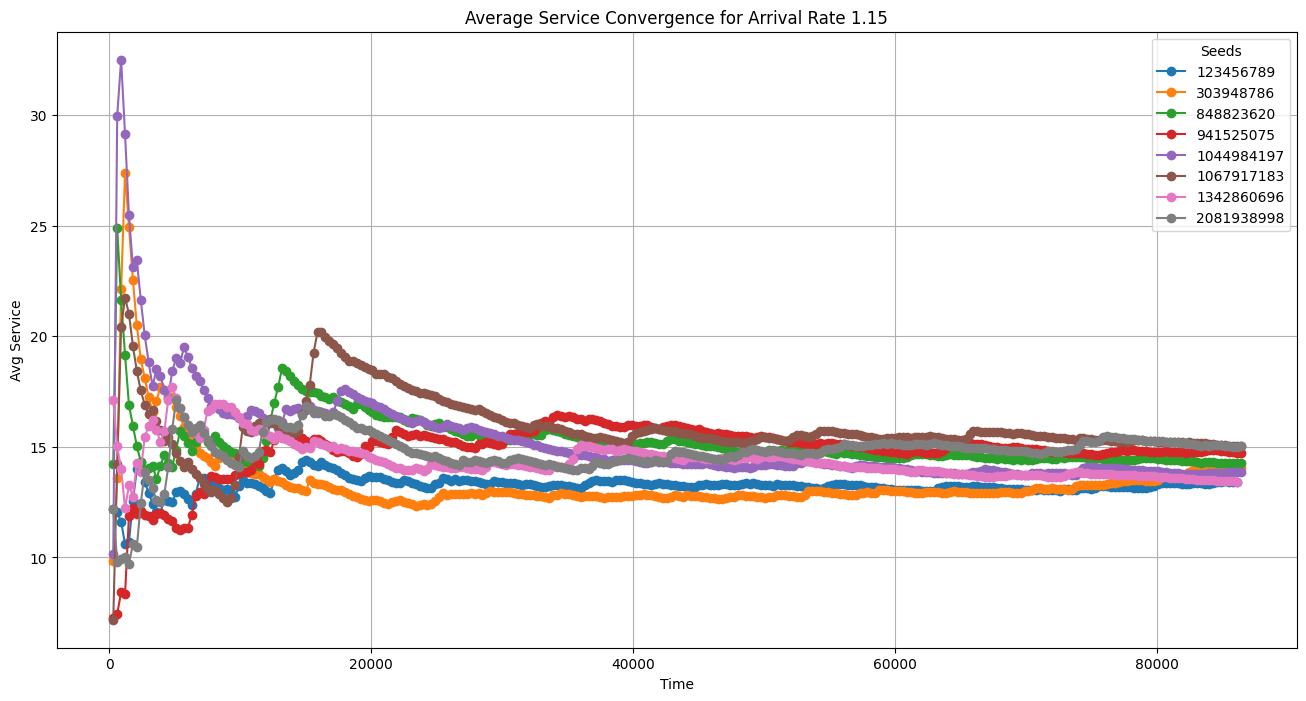

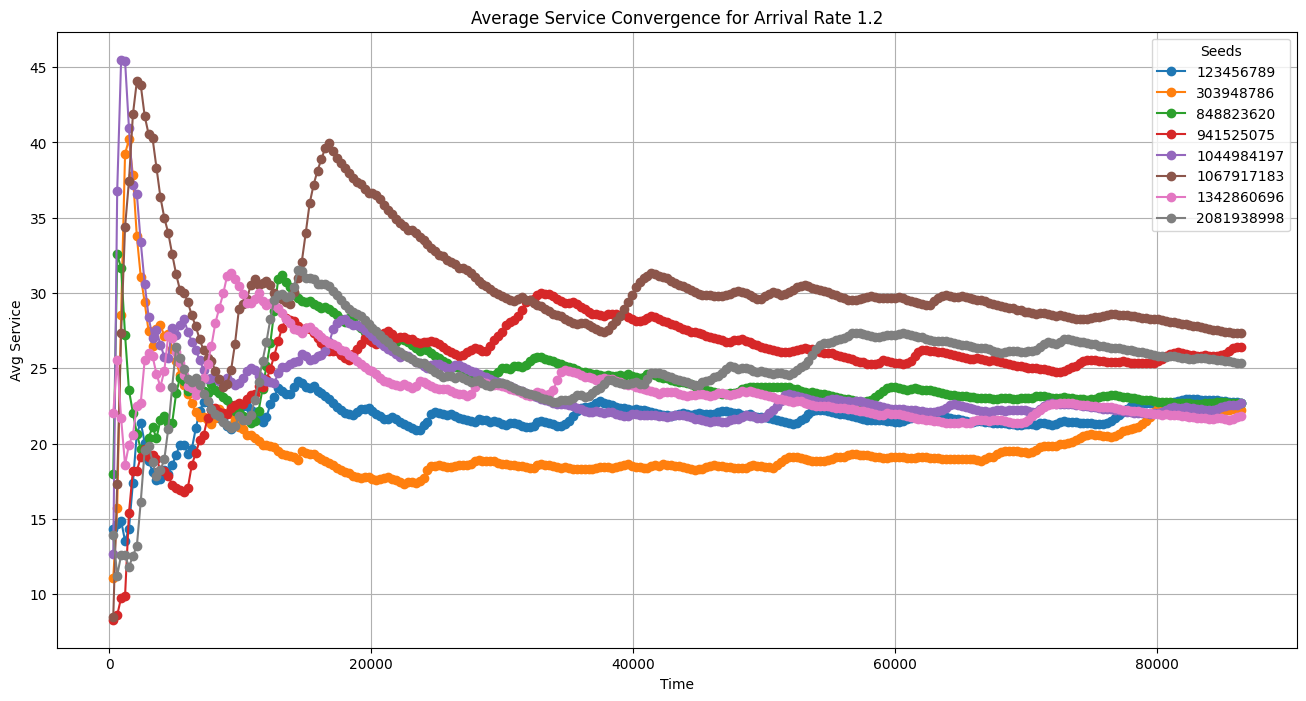

All plots have been generated and saved.


In [9]:
# Define the dataset parameters
auth_types = [1, 2]
arrival_rates = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2]

# Dynamically find all unique seeds from the filenames in the 'conv' directory
seeds = set()
for filename in glob.glob('./conv/data_*.csv'):
    try:
        # Extract the seed number from the filename
        # Assumes format: data_seed_arrival_rate_...
        seed_str = os.path.basename(filename).split('_')[1]
        seeds.add(int(seed_str))
    except (IndexError, ValueError):
        print(f"Could not parse seed from filename: {filename}")

# Convert the set of seeds to a sorted list
seeds = sorted(list(seeds))

# Iterate through each arrival rate to create a separate graph
for arrival_rate in arrival_rates:
    # Create a new figure and a single axis object for the current plot
    fig, ax = plt.subplots(figsize=(16, 8))

    # Iterate through each seed to plot the data from different runs
    for seed in seeds:
        try:
            # Construct the file path and load the data
            df = pd.read_csv(f'./conv/data_{seed}_{arrival_rate}_{1}_False_conv.csv')

            # Plot the data on the current axis
            ax.plot(df['time'], df['avg_service'], marker='o', label=seed)
        except FileNotFoundError:
            # Print a message if a file is not found
            print(f"File not found for arrival rate {arrival_rate} and seed {seed}. Skipping.")

    # Set the labels and title for the current plot
    ax.set_xlabel('Time')
    ax.set_ylabel('Avg Service')
    ax.set_title(f'Average Service Convergence for Arrival Rate {arrival_rate}')

    # Add a legend to the plot
    ax.legend(title='Seeds', loc='best')

    # Add a grid for better readability
    ax.grid(True)

    # Save the figure to a file
    plt.savefig(f'./convergence_plot_{arrival_rate}.png')

    # Display the plot
    plt.show()

print("All plots have been generated and saved.")

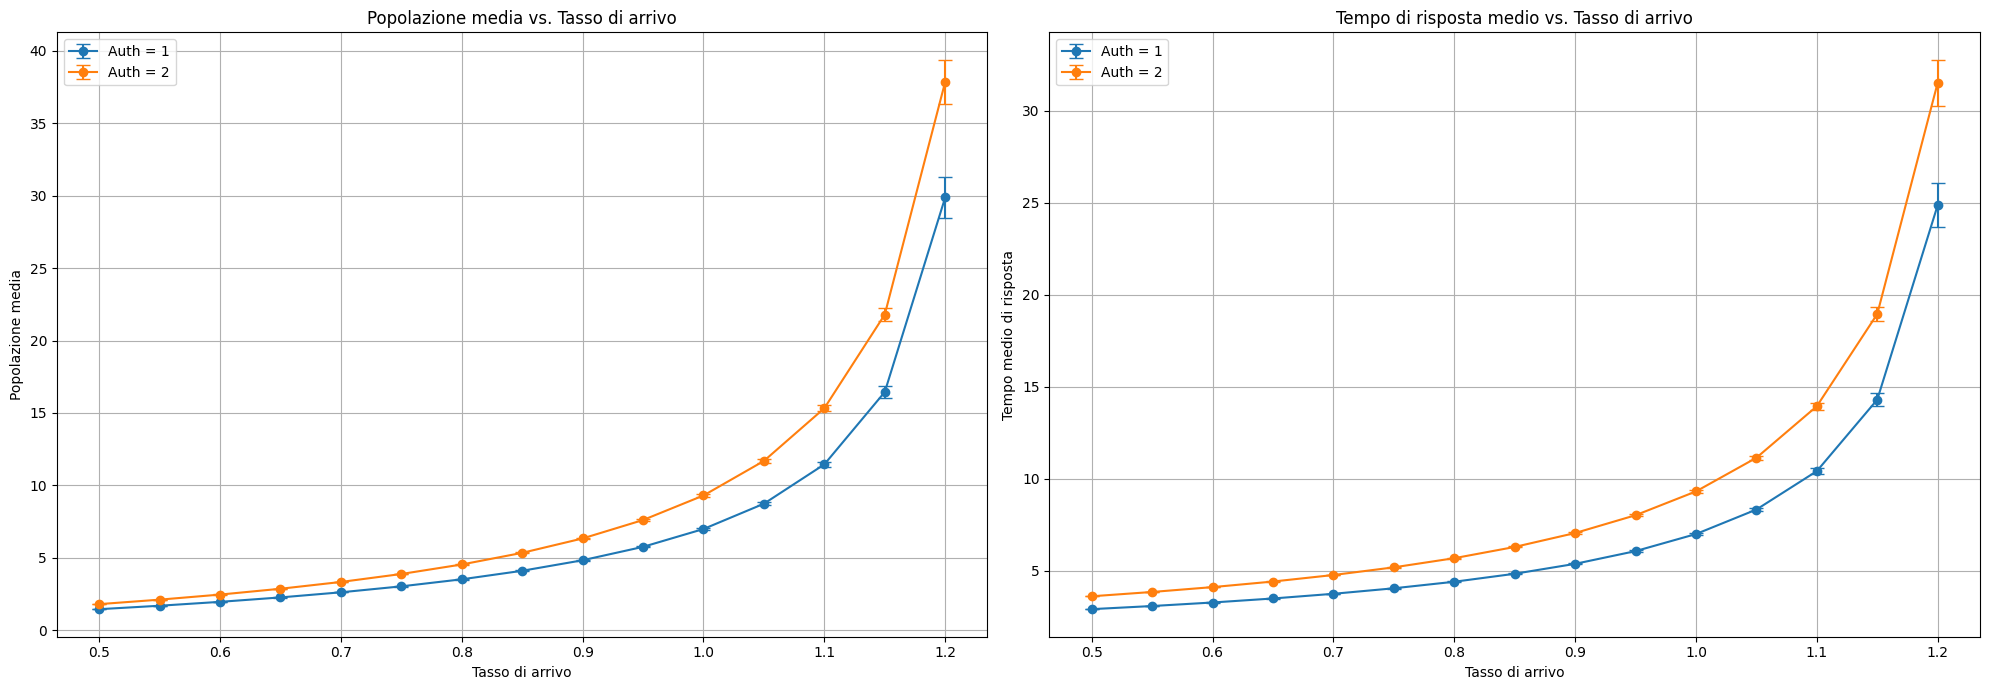

In [10]:
# Leggi il file CSV
df = pd.read_csv('data_obj_1_2_batch_means.csv')

# Raggruppa i dati per il campo 'auth'
auth_groups = df.groupby('auth')

# Crea una figura e due assi (subplot) affiancati
# 1 riga, 2 colonne
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# --- Grafico 1: avg_population vs arrival_rate ---
ax1 = axes[0]
for auth, group in auth_groups:
    ax1.errorbar(
        group['arrival_rate'],
        group['avg_population'],
        yerr=group['avg_population_ci'],
        label=f'Auth = {auth}',
        marker='o',
        capsize=5
    )
ax1.set_title('Popolazione media vs. Tasso di arrivo')
ax1.set_xlabel('Tasso di arrivo')
ax1.set_ylabel('Popolazione media')
ax1.legend()
ax1.grid(True)

# --- Grafico 2: avg_response_time vs arrival_rate ---
ax2 = axes[1]
for auth, group in auth_groups:
    ax2.errorbar(
        group['arrival_rate'],
        group['avg_response_time'],
        yerr=group['avg_response_time_ci'],
        label=f'Auth = {auth}',
        marker='o',
        capsize=5
    )
ax2.set_title('Tempo di risposta medio vs. Tasso di arrivo')
ax2.set_xlabel('Tasso di arrivo')
ax2.set_ylabel('Tempo medio di risposta')
ax2.legend()
ax2.grid(True)

# Aggiusta la spaziatura tra i subplot
plt.tight_layout()
plt.savefig('data_obj_1_2_batch_means.png')
plt.show()

In [11]:
# Group the data by 'auth'. 'b_improvement' and 'arrival_rate' to calculate the mean, min, and max of 'avg_response_time'
df = pd.read_csv('data_obj_3_batch_means.csv')

df = df[['b_improvement', 'arrival_rate', 'avg_response_time', 'avg_response_time_ci']]

df_no_b_impr = df[df['b_improvement'] == False]
df_b_impr = df[df['b_improvement'] == True]

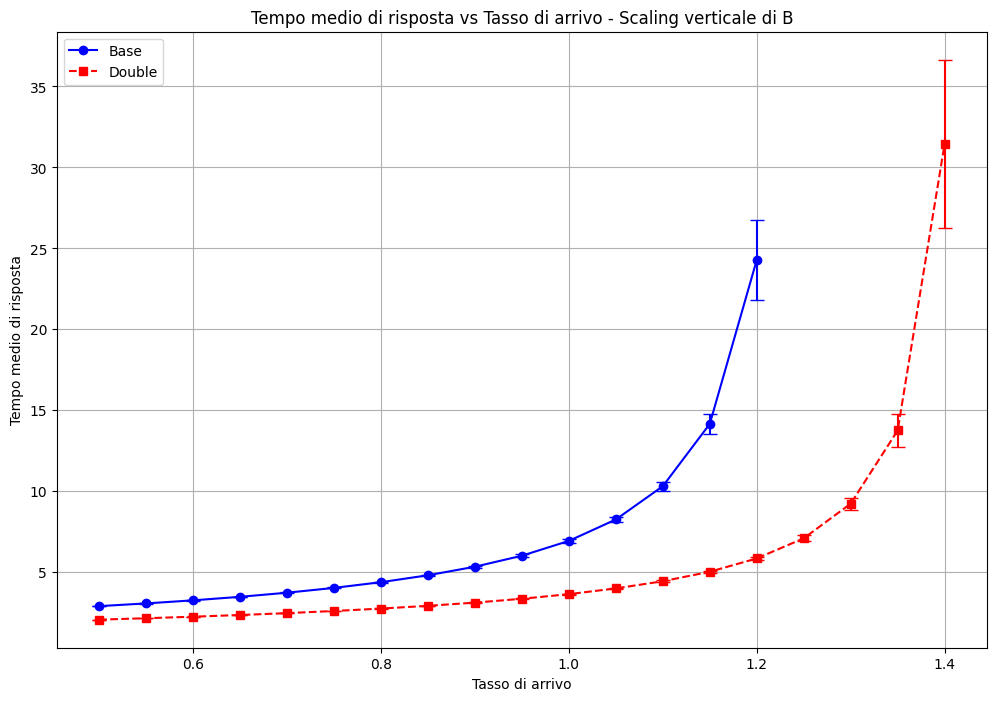

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the line and error bars for auth 1
ax.plot(df_no_b_impr['arrival_rate'], df_no_b_impr['avg_response_time'], color='blue', marker='o',
        label='Base')
ax.errorbar(
    df_no_b_impr['arrival_rate'],
    df_no_b_impr['avg_response_time'],
    yerr=df_no_b_impr['avg_response_time_ci'],
    fmt='none',
    color='blue',
    capsize=5
)

# Plot the line and error bars for auth 2
ax.plot(df_b_impr['arrival_rate'], df_b_impr['avg_response_time'], color='red', marker='s', linestyle='--',
        label='Double')
ax.errorbar(
    df_b_impr['arrival_rate'],
    df_b_impr['avg_response_time'],
    yerr=df_b_impr['avg_response_time_ci'],
    fmt='none',
    color='red',
    capsize=5
)

# Set labels and title
ax.set_xlabel('Tasso di arrivo')
ax.set_ylabel('Tempo medio di risposta')
ax.set_title('Tempo medio di risposta vs Tasso di arrivo - Scaling verticale di B')

# Add a legend
ax.legend()

# Add a grid for better readability
ax.grid(True)

# Save the plot to a file
plt.savefig('obj3.png')
plt.show()

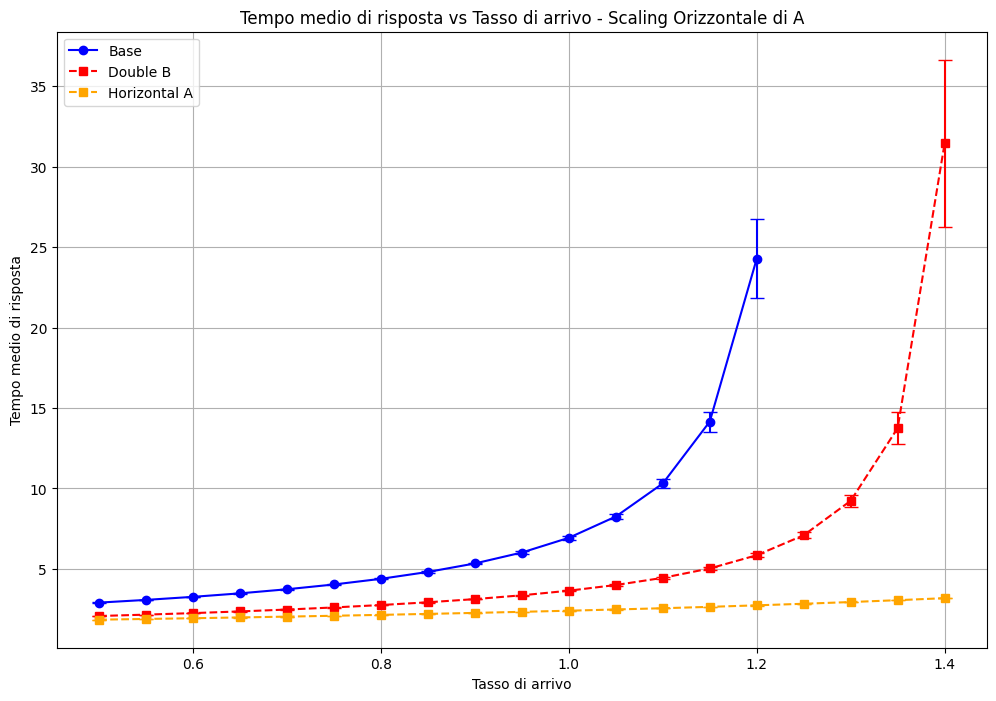

In [13]:
df_hor = pd.read_csv('data_horizontalA_batch_means.csv')


fig, ax = plt.subplots(figsize=(12, 8))

# Plot the line and error bars for auth 1
ax.plot(df_no_b_impr['arrival_rate'], df_no_b_impr['avg_response_time'], color='blue', marker='o',
        label='Base')
ax.errorbar(
    df_no_b_impr['arrival_rate'],
    df_no_b_impr['avg_response_time'],
    yerr=df_no_b_impr['avg_response_time_ci'],
    fmt='none',
    color='blue',
    capsize=5
)

# Plot the line and error bars for auth 2
ax.plot(df_b_impr['arrival_rate'], df_b_impr['avg_response_time'], color='red', marker='s', linestyle='--',
        label='Double B')
ax.errorbar(
    df_b_impr['arrival_rate'],
    df_b_impr['avg_response_time'],
    yerr=df_b_impr['avg_response_time_ci'],
    fmt='none',
    color='red',
    capsize=5
)

ax.plot(df_hor['arrival_rate'], df_hor['avg_response_time'], color='orange', marker='s', linestyle='--',
        label='Horizontal A')
ax.errorbar(
    df_hor['arrival_rate'],
    df_hor['avg_response_time'],
    yerr=df_hor['avg_response_time_ci'],
    fmt='none',
    color='orange',
    capsize=5
)

# Set labels and title
ax.set_xlabel('Tasso di arrivo')
ax.set_ylabel('Tempo medio di risposta')
ax.set_title('Tempo medio di risposta vs Tasso di arrivo - Scaling Orizzontale di A')

# Add a legend
ax.legend()

# Add a grid for better readability
ax.grid(True)

# Save the plot to a file
plt.savefig('hor.png')
plt.show()

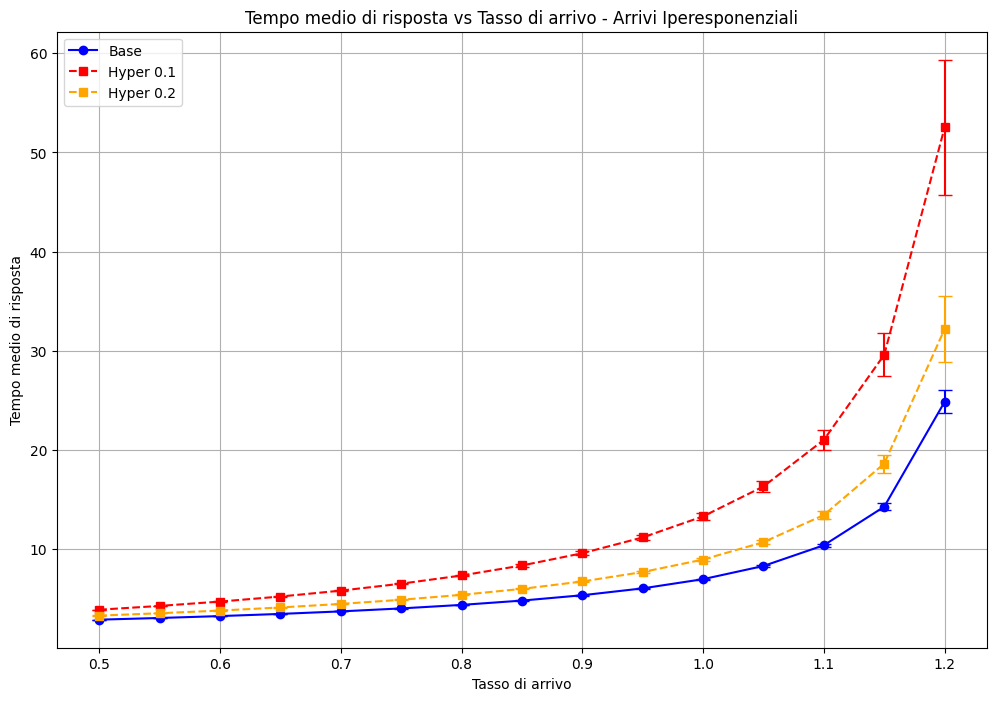

In [14]:
df_hyper = pd.read_csv('data_hyper_batch_means.csv')
df_hyper1 = df_hyper[df_hyper['p'] == 0.1]
df_hyper2 = df_hyper[df_hyper['p'] == 0.2]
df_auth1 = pd.read_csv('data_obj_1_2_batch_means.csv')
df_auth1 = df_auth1[df_auth1['auth'] == 1]


fig, ax = plt.subplots(figsize=(12, 8))

# Plot the line and error bars for auth 1
ax.plot(df_auth1['arrival_rate'], df_auth1['avg_response_time'], color='blue', marker='o',
        label='Base')
ax.errorbar(
    df_auth1['arrival_rate'],
    df_auth1['avg_response_time'],
    yerr=df_auth1['avg_response_time_ci'],
    fmt='none',
    color='blue',
    capsize=5
)

# Plot the line and error bars for auth 2
ax.plot(df_hyper1['arrival_rate'], df_hyper1['avg_response_time'], color='red', marker='s', linestyle='--',
        label='Hyper 0.1')
ax.errorbar(
    df_hyper1['arrival_rate'],
    df_hyper1['avg_response_time'],
    yerr=df_hyper1['avg_response_time_ci'],
    fmt='none',
    color='red',
    capsize=5
)

ax.plot(df_hyper2['arrival_rate'], df_hyper2['avg_response_time'], color='orange', marker='s', linestyle='--',
        label='Hyper 0.2')
ax.errorbar(
    df_hyper2['arrival_rate'],
    df_hyper2['avg_response_time'],
    yerr=df_hyper2['avg_response_time_ci'],
    fmt='none',
    color='orange',
    capsize=5
)

# Set labels and title
ax.set_xlabel('Tasso di arrivo')
ax.set_ylabel('Tempo medio di risposta')
ax.set_title('Tempo medio di risposta vs Tasso di arrivo - Arrivi Iperesponenziali')

# Add a legend
ax.legend()

# Add a grid for better readability
ax.grid(True)

# Save the plot to a file
plt.savefig('hyper.png')
plt.show()